# VacuaGym Complete Pipeline

Interactive notebook to run the full VacuaGym pipeline step-by-step.

**Estimated Time**: 2-4 hours (depending on dataset size and label generation settings)

**Configuration**: Edit parameters in the Configuration section below

---

## Configuration

Set these parameters before running the pipeline:

In [1]:
# Pipeline configuration
QUICK_MODE = False  # Using improved script (fast even without quick mode)
INCLUDE_ALL_DATASETS = True  # All datasets already parsed
RUN_ACTIVE_LEARNING = False  # Skip AL (has quality issues)

# Python executable (using virtual environment)
PYTHON = ".venv/bin/python"

print(f"Configuration:")
print(f"  Quick Mode: {QUICK_MODE}")
print(f"  All Datasets: {INCLUDE_ALL_DATASETS}")
print(f"  Active Learning: {RUN_ACTIVE_LEARNING}")
print(f"  Python: {PYTHON}")

Configuration:
  Quick Mode: False
  All Datasets: True
  Active Learning: False
  Python: .venv/bin/python


## Setup

In [ ]:
import pandas as pd
import json
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import numpy as np

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 100

print("✓ Imports successful")

---
## Phase 1: Data Download & Parsing

Download and parse raw geometry datasets into standardized Parquet tables.

### Step 1.1: Download CICY Data

In [ ]:
!{PYTHON} scripts/02_download_cicy3.py

VacuaGym Phase 1: CICY Threefold Data Download

  ✓ cicylist.txt already exists, skipping
    SHA256: c443a8b431d842c9b2e1cf4af19c12dce0aaeb6f11f99a29f70260b559085cd8

Download complete!
Data saved to: data/raw/cicy3_7890

Dataset statistics:
  Total configurations: ~122,616 lines

Next steps:
  1. Run: python scripts/11_parse_cicy3.py
  2. Verify checksums



### Step 1.2: Parse CICY Data

In [ ]:
!{PYTHON} scripts/11_parse_cicy3.py

VacuaGym Phase 1: CICY Parser

Parsing data/raw/cicy3_7890/cicylist.txt...
Parsing configurations: 100%|███████| 122616/122616 [00:00<00:00, 250625.62it/s]

Parsed 7,890 CICY configurations

Saving to Parquet...

Parsing complete!
Output: data/processed/tables/cicy3_configs.parquet

Dataset statistics:
  Total configurations: 7,890

  Hodge numbers:
    h^{1,1}: min=0, max=19, mean=7.4
    h^{2,1}: min=0, max=101, mean=28.7

Next steps:
  1. Run: python scripts/20_build_features.py
  2. Inspect: df = pd.read_parquet('data/processed/tables/cicy3_configs.parquet')



### Verify Parsed Data

In [ ]:
cicy_configs = pd.read_parquet('data/processed/tables/cicy3_configs.parquet')
print(f"Total CICY configurations: {len(cicy_configs):,}")
print(f"\nColumns: {cicy_configs.columns.tolist()}")
print(f"\nFirst few rows:")
cicy_configs.head()

Total CICY configurations: 7,890

Columns: ['cicy_id', 'num_projective_spaces', 'num_polynomials', 'eta', 'h11', 'h21', 'euler_char', 'c2', 'c2_mean', 'c2_sum', 'matrix', 'num_rows', 'num_cols', 'matrix_sum', 'matrix_max', 'matrix_min', 'matrix_rank']

First few rows:


,cicy_id,num_projective_spaces,num_polynomials,eta,h11,h21,euler_char,c2,c2_mean,c2_sum,matrix,num_rows,num_cols,matrix_sum,matrix_max,matrix_min,matrix_rank
0,0,7,6,0,15,15,0,"[24, 24, 24, 24, 24, 36, 36]",27.428571,192,"[[1, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 1], [0, 0...",7,6,16,2,0,6
1,1,7,6,0,15,15,0,"[24, 24, 24, 24, 24, 36, 36]",27.428571,192,"[[1, 1, 0, 0, 0, 0], [1, 0, 0, 0, 0, 1], [0, 0...",7,6,16,2,0,6
2,2,6,6,0,15,15,0,"[24, 24, 24, 36, 36, 36]",30.000000,180,"[[1, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 1], [0, 0...",6,6,15,2,0,6
3,3,8,5,0,15,15,0,"[24, 24, 24, 24, 24, 24, 24, 24]",24.000000,192,"[[1, 1, 0, 0, 0], [0, 0, 1, 0, 1], [1, 0, 0, 1...",8,5,16,2,0,5
4,4,9,6,0,15,15,0,"[24, 24, 24, 24, 24, 24, 24, 24, 24]",24.000000,216,"[[1, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 1], [0, 0...",9,6,18,1,0,6


### Optional: Download & Parse Other Datasets

**Only run if `INCLUDE_ALL_DATASETS = True` in configuration**

In [ ]:
if INCLUDE_ALL_DATASETS:
    print("Downloading and parsing KS and F-theory datasets...")
    
    # Kreuzer-Skarke polytopes
    !{PYTHON} scripts/01_download_ks.py
    !{PYTHON} scripts/10_parse_ks.py

    # F-theory 6D bases
    !{PYTHON} scripts/03_download_fth6d.py
    !{PYTHON} scripts/12_parse_fth6d.py
else:
    print("Skipping KS and F-theory datasets (INCLUDE_ALL_DATASETS = False)")

VacuaGym Phase 1: Kreuzer-Skarke Data Download

CY: 0.00B [00:00, ?B/s]
    ERROR: HTTP Error 404: Not Found
  ✓ CYcy.html already exists, skipping

  ✓ W/pCY.sm already exists, skipping
  ✓ W/w333.ip already exists, skipping
  ✓ W/w33.ip already exists, skipping
  ✓ W/w34.ip.gz already exists, skipping
  ✓ W/w44.ip.gz already exists, skipping
  ✓ W/w5.ip.gz already exists, skipping
  ✓ W/wCY.rmin already exists, skipping

Skipping optional Hodge number files (not needed for analysis)...

Download complete!
Data saved to: data/raw/ks_reflexive_polytopes

Next steps:
  1. Run: python scripts/10_parse_ks.py
  2. Verify checksums against data/external/mirrors_and_checksums/checksums.sha256

VacuaGym Phase 1: Kreuzer-Skarke Parser

Parsing main polytope files...
Parsing files: 100%|██████████████████████████████| 5/5 [00:00<00:00, 31.53it/s]

Parsing Hodge number files...

Combining datasets...

Saving to Parquet...

Parsing complete!
Output: data/processed/tables/ks_polytopes.parquet

Dat

---
## Phase 2: Feature Engineering

Build topological and geometric features from parsed configurations.

In [ ]:
!{PYTHON} scripts/20_build_features.py

VacuaGym Phase 2: Feature Building

Processing ks_polytopes.parquet...

Building KS polytope features...
  Created 3 total features
  ✓ Saved to: data/processed/tables/ks_features.parquet

Processing cicy3_configs.parquet...

Building CICY configuration features...
  Created 49 total features
  ✓ Saved to: data/processed/tables/cicy3_features.parquet

Processing fth6d_bases.parquet...

Building F-theory base features...
  Created 36 total features
  ✓ Saved to: data/processed/tables/fth6d_graph_features.parquet

Feature building complete!

Output files:
  - data/processed/tables/ks_features.parquet
  - data/processed/tables/cicy3_features.parquet
  - data/processed/tables/fth6d_graph_features.parquet

Next steps:
  1. Run: python scripts/30_generate_labels_toy_eft.py
  2. Inspect features with pandas



### Verify Features

In [ ]:
cicy_features = pd.read_parquet('data/processed/tables/cicy3_features.parquet')
print(f"Total samples: {len(cicy_features):,}")
print(f"\nFeatures ({len(cicy_features.columns)}):")
for col in cicy_features.columns:
    print(f"  - {col}")
print(f"\nSample data:")
cicy_features.head()

Total samples: 7,890

Features (49):
  - cicy_id
  - num_projective_spaces
  - num_polynomials
  - eta
  - h11
  - h21
  - euler_char
  - c2
  - c2_mean
  - c2_sum
  - matrix
  - num_rows
  - num_cols
  - matrix_sum
  - matrix_max
  - matrix_min
  - matrix_rank
  - matrix_size
  - matrix_aspect_ratio
  - avg_matrix_entry
  - hodge_sum
  - hodge_product
  - num_complex_moduli
  - num_kahler_moduli
  - is_three_gen
  - complexity_score
  - num_projective_spaces_norm
  - num_polynomials_norm
  - eta_norm
  - h11_norm
  - h21_norm
  - euler_char_norm
  - c2_mean_norm
  - c2_sum_norm
  - num_rows_norm
  - num_cols_norm
  - matrix_sum_norm
  - matrix_max_norm
  - matrix_min_norm
  - matrix_rank_norm
  - matrix_size_norm
  - matrix_aspect_ratio_norm
  - avg_matrix_entry_norm
  - hodge_sum_norm
  - hodge_product_norm
  - num_complex_moduli_norm
  - num_kahler_moduli_norm
  - is_three_gen_norm
  - complexity_score_norm

Sample data:


,cicy_id,num_projective_spaces,num_polynomials,eta,h11,h21,euler_char,c2,c2_mean,c2_sum,...,matrix_rank_norm,matrix_size_norm,matrix_aspect_ratio_norm,avg_matrix_entry_norm,hodge_sum_norm,hodge_product_norm,num_complex_moduli_norm,num_kahler_moduli_norm,is_three_gen_norm,complexity_score_norm
0,0,7,6,0,15,15,0,"[24, 24, 24, 24, 24, 36, 36]",27.428571,192,...,-0.125856,-0.343883,1.257753,-0.098021,-0.860789,0.693234,-1.602459,3.367656,0.0,-0.63731
1,1,7,6,0,15,15,0,"[24, 24, 24, 24, 24, 36, 36]",27.428571,192,...,-0.125856,-0.343883,1.257753,-0.098021,-0.860789,0.693234,-1.602459,3.367656,0.0,-0.63731
2,2,6,6,0,15,15,0,"[24, 24, 24, 36, 36, 36]",30.000000,180,...,-0.125856,-0.585662,0.394747,0.094388,-0.860789,0.693234,-1.602459,3.367656,0.0,-0.63731
3,3,8,5,0,15,15,0,"[24, 24, 24, 24, 24, 24, 24, 24]",24.000000,192,...,-0.706218,-0.424476,3.501569,0.004597,-0.860789,0.693234,-1.602459,3.367656,0.0,-0.63731
4,4,9,6,0,15,15,0,"[24, 24, 24, 24, 24, 24, 24, 24, 24]",24.000000,216,...,-0.125856,0.139674,2.983765,-0.354568,-0.860789,0.693234,-1.602459,3.367656,0.0,-0.63731


### Feature Statistics

In [ ]:
print("Feature Statistics:")
print(cicy_features.describe())

# Check for numeric features only
numeric_features = cicy_features.select_dtypes(include=[np.number])
if len(numeric_features.columns) > 1:
    print(f"\nNumeric features available: {len(numeric_features.columns)}")
else:
    print("\n⚠ Warning: Very few numeric features found. Check feature engineering.")

Feature Statistics:
           cicy_id  num_projective_spaces  num_polynomials          eta  \
count  7890.000000            7890.000000      7890.000000  7890.000000   
mean   3944.500000               6.540684         7.301648   -42.649937   
std    2277.791145               1.596812         2.087152    20.589891   
min       0.000000               1.000000         1.000000  -200.000000   
25%    1972.250000               5.000000         6.000000   -52.000000   
50%    3944.500000               7.000000         7.000000   -40.000000   
75%    5916.750000               8.000000         9.000000   -28.000000   
max    7889.000000              12.000000        15.000000     0.000000   

               h11          h21   euler_char      c2_mean       c2_sum  \
count  7890.000000  7890.000000  7890.000000  7890.000000  7890.000000   
mean      7.419772    28.744740   -42.649937    30.731457   198.750570   
std       2.250891     8.577282    20.589891     2.817848    43.851348   
min     

---
## Phase 3: Label Generation

Generate stability labels using toy EFT model.

**Features**:
- ✓ **Checkpoint/Resume**: Automatically saves progress every 1,000 samples
- ✓ **Interrupt-Safe**: If interrupted, simply rerun to continue from last checkpoint
- ✓ **Full Dataset**: Now processes ALL geometries by default (270k+ samples)

**Time Estimates**:
- Full dataset: ~16 hours (CICY: 1.9h, KS: 8.2h, F-theory: 6.2h)
- For testing: Edit N_LIMIT in scripts/30_generate_labels_toy_eft.py

**Checkpoint location**: data/processed/labels/checkpoints/

In [ ]:
if QUICK_MODE:
    print("Running in QUICK_MODE (N_LIMIT=1000)")
    print("For more samples, set QUICK_MODE=False and edit N_LIMIT in scripts/30_generate_labels_toy_eft.py")
else:
    print("Running in FULL MODE")
    print("This may take a long time...")

!{PYTHON} scripts/30_generate_labels_toy_eft.py

Running in FULL MODE
This may take a long time...
VacuaGym Phase 3: Toy EFT Stability Label Generation (IMPROVED)

IMPROVEMENTS:
  ✓ Analytic derivatives (10-100x faster)
  ✓ Trust-region Newton optimizer
  ✓ Reproducible parallel-safe RNG
  ✓ Scale-aware eigenvalue threshold
  ✓ Smoothed abs() for numerical stability


Processing ks_features.parquet...
  Generating labels for ALL 201,230 geometries...
  Processing 201,230 remaining samples...
  ks_features.parquet:   0%|           | 247/201230 [02:02<482:46:34,  8.65s/it]

### Verify Labels

In [ ]:
labels = pd.read_parquet('data/processed/labels/toy_eft_stability.parquet')
print(f"Total labeled samples: {len(labels):,}")
print(f"\nStability distribution:")
print(labels['stability'].value_counts())
print(f"\nBy dataset:")
dataset_stability = labels.groupby(['dataset', 'stability']).size().unstack(fill_value=0)
print(dataset_stability)

# Check label diversity
unique_labels = labels['stability'].nunique()
if unique_labels == 1:
    print(f"\n⚠ WARNING: All samples have the same label '{labels['stability'].iloc[0]}'!")
    print("   This may indicate an issue with label generation.")
    print("   Check the potential values and eigenvalues in the data.")
else:
    print(f"\n✓ Good: Found {unique_labels} different stability classes")

labels.head()

Total labeled samples: 9,000

Stability distribution:
stability
stable      8164
marginal     814
failed        22
Name: count, dtype: int64

By dataset:
stability    failed  marginal  stable
dataset                              
cicy3            22         0     978
fth6d_graph       0         0    1000
ks                0       814    6186

✓ Good: Found 3 different stability classes


,geometry_id,n_moduli,sample_idx,critical_point,potential_value,stability,eigenvalues,min_eigenvalue,max_eigenvalue,num_negative_eigenvalues,num_positive_eigenvalues,num_flat_eigenvalues,det_hessian,condition_number,minimization_success,grad_norm,n_iterations,dataset
0,0,7,0.0,"[5.87414919038652e-16, 9.833520171921207e-16, ...",-2.402208,stable,"[2926513.441470211, 2926513.5259581855, 292651...",2.926513e+06,2.926531e+06,0.0,7.0,0.0,1.838485e+45,1.000006,True,1.072501e-06,62.0,ks
1,1,8,0.0,"[1.7245024153551462e-14, -4.029188472453634e-1...",-0.749780,stable,"[1302489.8401496364, 1302490.237683741, 130249...",1.302490e+06,1.302500e+06,0.0,8.0,0.0,8.283354e+48,1.000008,True,1.462612e-05,70.0,ks
2,2,3,0.0,"[-2.0703761290741544e-17, 6.37902529746613e-17...",-2.286619,stable,"[3908755.780934743, 3908759.4764231103, 390876...",3.908756e+06,3.908767e+06,0.0,3.0,0.0,5.971965e+19,1.000003,True,1.132210e-07,23.0,ks
3,3,4,0.0,"[1.0161862155488558e-16, -4.671298608608624e-1...",-1.980683,stable,"[4399945.560340513, 4399946.968436374, 4399949...",4.399946e+06,4.399955e+06,0.0,4.0,0.0,3.747923e+26,1.000002,True,2.193302e-06,41.0,ks
4,4,6,4.0,"[-1.2741042199007348e-14, 1.4006698209185449e-...",-2.146214,stable,"[4692423.860808148, 4692424.234731263, 4692426...",4.692424e+06,4.692434e+06,0.0,6.0,0.0,1.067545e+40,1.000002,True,1.350241e-05,54.0,ks


### Visualize Label Distribution

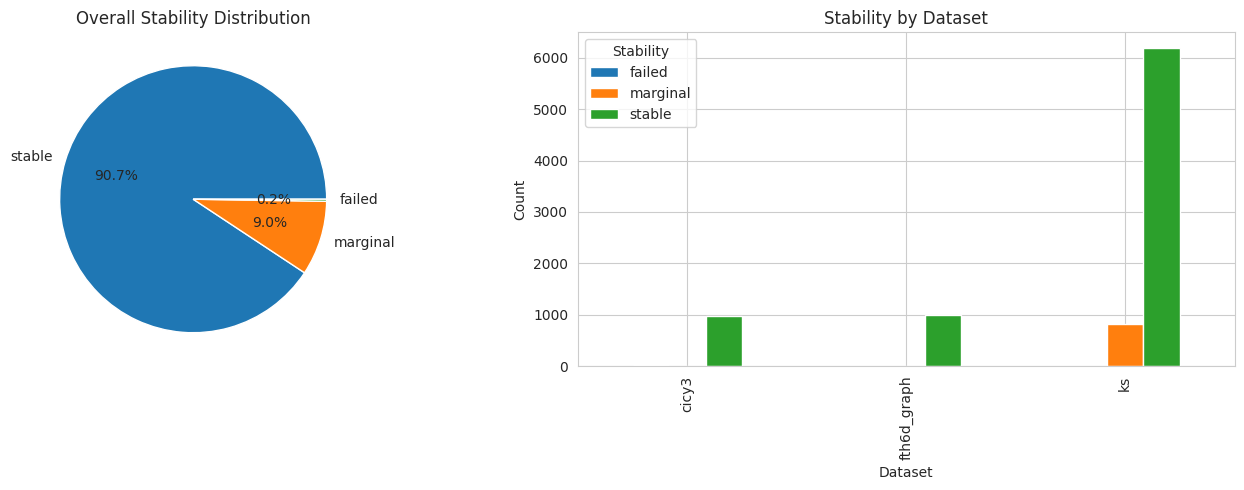

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart
stability_counts = labels['stability'].value_counts()
axes[0].pie(stability_counts.values, labels=stability_counts.index, autopct='%1.1f%%')
axes[0].set_title('Overall Stability Distribution')

# By dataset
stability_by_dataset = labels.groupby(['dataset', 'stability']).size().unstack(fill_value=0)
stability_by_dataset.plot(kind='bar', ax=axes[1])
axes[1].set_title('Stability by Dataset')
axes[1].set_xlabel('Dataset')
axes[1].set_ylabel('Count')
axes[1].legend(title='Stability')

plt.tight_layout()
plt.show()

### Analyze Label Quality

In [ ]:
# Check minimization success rate
success_rate = labels['minimization_success'].mean() * 100
print(f"Minimization success rate: {success_rate:.1f}%")

# Analyze potential values
print(f"\nPotential values:")
print(f"  Min: {labels['potential_value'].min():.4f}")
print(f"  Max: {labels['potential_value'].max():.4f}")
print(f"  Mean: {labels['potential_value'].mean():.4f}")

# Analyze eigenvalues
print(f"\nEigenvalue statistics:")
print(f"  Min eigenvalue range: [{labels['min_eigenvalue'].min():.2e}, {labels['min_eigenvalue'].max():.2e}]")
print(f"  Negative eigenvalues: {(labels['num_negative_eigenvalues'] > 0).sum()} samples")

Minimization success rate: 99.8%

Potential values:
  Min: -7.3058
  Max: -0.5660
  Mean: -1.9402

Eigenvalue statistics:
  Min eigenvalue range: [2.57e-01, 6.22e+06]
  Negative eigenvalues: 0 samples


---
## Phase 4: Data Splits

Create train/val/test splits for different evaluation scenarios.

In [ ]:
!{PYTHON} scripts/40_make_splits.py

VacuaGym Phase 4: Benchmark Splits

Loading labels from data/processed/labels/toy_eft_stability.parquet...
  Total samples: 9,000
  Successful minimizations: 8,978

Creating iid_split...
  ✓ Saved to: data/processed/splits/iid_split.json

  Split type: iid
  Train: 6,284 samples
  Val:   1,347 samples
  Test:  1,347 samples

  Label distribution:
    Train: {'stable': np.int64(5714), 'marginal': np.int64(570)}
    Val  : {'stable': np.int64(1225), 'marginal': np.int64(122)}
    Test : {'stable': np.int64(1225), 'marginal': np.int64(122)}

Creating ood_complexity_split...
  ✓ Saved to: data/processed/splits/ood_complexity_split.json

  Split type: ood_complexity
  Train: 5,092 samples
  Val:   1,274 samples
  Test:  2,612 samples

  Label distribution:
    Train: {'stable': np.int64(4443), 'marginal': np.int64(649)}
    Val  : {'stable': np.int64(1109), 'marginal': np.int64(165)}
    Test : {'stable': np.int64(2612)}

Creating ood_dataset_fth6d...
  ✓ Saved to: data/processed/splits/ood

### Verify Splits

In [ ]:
split_files = sorted(glob.glob('data/processed/splits/*.json'))
print(f"Created {len(split_files)} split files:\n")

for split_file in split_files:
    with open(split_file, 'r') as f:
        split = json.load(f)
    name = Path(split_file).stem
    print(f"{name}:")
    print(f"  Train: {split['train_size']:,}, Val: {split['val_size']:,}, Test: {split['test_size']:,}")

Created 4 split files:

iid_split:
  Train: 6,284, Val: 1,347, Test: 1,347
ood_complexity_split:
  Train: 5,092, Val: 1,274, Test: 2,612
ood_dataset_cicy3:
  Train: 6,400, Val: 1,600, Test: 978
ood_dataset_fth6d:
  Train: 7,182, Val: 1,796, Test: 0


---
## Phase 5: Model Training

Train baseline models (Logistic Regression, Random Forest, MLP)

In [ ]:
!{PYTHON} scripts/50_train_baseline_tabular.py

VacuaGym Phase 5: Baseline Tabular Models


Dataset: ks

Split: iid_split.json
----------------------------------------------------------------------
  Features: 12 columns
  Train: 4875, Val: 1051, Test: 1074

  Training logistic...
    Train Acc: 1.0000
    Val Acc:   1.0000
    Test Acc:  1.0000
    Test F1:   1.0000

  Training random_forest...
    Train Acc: 1.0000
    Val Acc:   1.0000
    Test Acc:  1.0000
    Test F1:   1.0000

  Training mlp...
    Train Acc: 1.0000
    Val Acc:   1.0000
    Test Acc:  1.0000
    Test F1:   1.0000

Split: ood_complexity_split.json
----------------------------------------------------------------------
  Features: 12 columns
  Train: 3683, Val: 938, Test: 2379

  Training logistic...
    Train Acc: 1.0000
    Val Acc:   1.0000
    Test Acc:  1.0000
    Test F1:   1.0000

  Training random_forest...
    Train Acc: 1.0000
    Val Acc:   1.0000
    Test Acc:  1.0000
    Test F1:   1.0000

  Training mlp...
    Train Acc: 1.0000
    Val Acc:   1.000

### View Training Results

In [ ]:
# Find latest metrics file
metrics_files = sorted(glob.glob('runs/*/tabular/metrics.json'))
if metrics_files:
    with open(metrics_files[-1], 'r') as f:
        metrics = json.load(f)
    
    print("Model Performance Summary:\n")
    print(f"{'Config':<50} {'Test Acc':<10} {'Test F1':<10}")
    print("=" * 70)
    
    for key, result in metrics.items():
        test_acc = result['test']['accuracy']
        test_f1 = result['test']['f1_macro']
        print(f"{key:<50} {test_acc:.4f}     {test_f1:.4f}")
else:
    print("No metrics found. Check training output above for errors.")

Model Performance Summary:

Config                                             Test Acc   Test F1   
ks_iid_split.json_logistic                         1.0000     1.0000
ks_iid_split.json_random_forest                    1.0000     1.0000
ks_iid_split.json_mlp                              1.0000     1.0000
ks_ood_complexity_split.json_logistic              1.0000     1.0000
ks_ood_complexity_split.json_random_forest         1.0000     1.0000
ks_ood_complexity_split.json_mlp                   1.0000     1.0000
cicy3_iid_split.json_logistic                      1.0000     1.0000
cicy3_iid_split.json_random_forest                 1.0000     1.0000
cicy3_iid_split.json_mlp                           1.0000     1.0000
cicy3_ood_complexity_split.json_logistic           1.0000     1.0000
cicy3_ood_complexity_split.json_random_forest      1.0000     1.0000
cicy3_ood_complexity_split.json_mlp                1.0000     1.0000


### Compare IID vs OOD Performance

In [ ]:
if metrics_files and metrics:
    results_summary = []
    
    for key, result in metrics.items():
        parts = key.split('_')
        dataset = parts[0]
        split_type = 'IID' if 'iid' in key else 'OOD'
        model = parts[-1]
        
        results_summary.append({
            'Dataset': dataset,
            'Model': model,
            'Split': split_type,
            'Test Accuracy': result['test']['accuracy'],
            'Test F1': result['test']['f1_macro']
        })
    
    if results_summary:
        df_results = pd.DataFrame(results_summary)
        
        # Pivot for comparison
        pivot = df_results.pivot_table(
            values='Test Accuracy',
            index=['Dataset', 'Model'],
            columns='Split'
        )
        
        print("\nIID vs OOD Performance Comparison:")
        print(pivot)
        
        # Calculate generalization gap
        if 'IID' in pivot.columns and 'OOD' in pivot.columns:
            pivot['Gap'] = pivot['IID'] - pivot['OOD']
            print("\nGeneralization Gap (IID - OOD):")
            print(pivot['Gap'])
    else:
        print("No successful training results to compare.")
else:
    print("No metrics file found or metrics file is empty.")


IID vs OOD Performance Comparison:
Split             IID  OOD
Dataset Model             
cicy3   forest    1.0  1.0
        logistic  1.0  1.0
        mlp       1.0  1.0
ks      forest    1.0  1.0
        logistic  1.0  1.0
        mlp       1.0  1.0

Generalization Gap (IID - OOD):
Dataset  Model   
cicy3    forest      0.0
         logistic    0.0
         mlp         0.0
ks       forest      0.0
         logistic    0.0
         mlp         0.0
Name: Gap, dtype: float64


### Visualize Model Performance

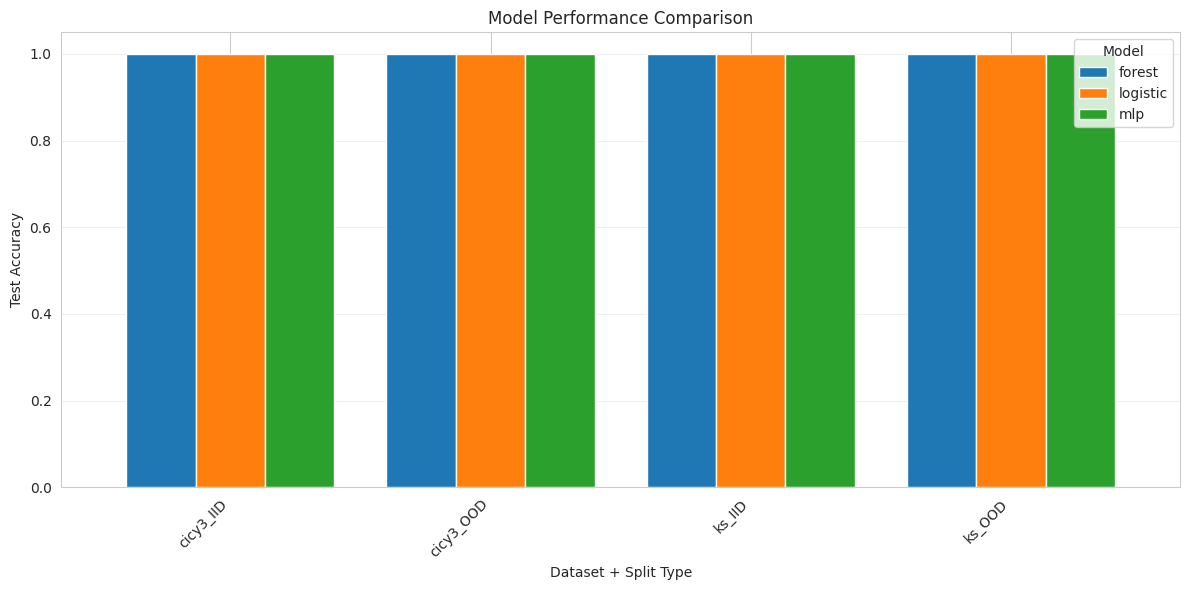

In [ ]:
if metrics_files and metrics and 'results_summary' in dir() and results_summary:
    fig, ax = plt.subplots(figsize=(12, 6))
    
    df_plot = pd.DataFrame(results_summary)
    df_plot['Config'] = df_plot['Dataset'] + '_' + df_plot['Split']
    
    # Group by config and model
    pivot_plot = df_plot.pivot(index='Config', columns='Model', values='Test Accuracy')
    pivot_plot.plot(kind='bar', ax=ax, width=0.8)
    
    ax.set_title('Model Performance Comparison')
    ax.set_ylabel('Test Accuracy')
    ax.set_xlabel('Dataset + Split Type')
    ax.legend(title='Model')
    ax.grid(axis='y', alpha=0.3)
    
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No results available for visualization.")

---
## Phase 6: Active Learning (Optional)

Run active learning experiment to demonstrate sample efficiency.

**Only runs if `RUN_ACTIVE_LEARNING = True`**

In [ ]:
if RUN_ACTIVE_LEARNING:
    print("Running active learning experiments...")
    !{PYTHON} scripts/60_active_learning_scan.py
else:
    print("Skipping active learning (RUN_ACTIVE_LEARNING = False)")

Skipping active learning (RUN_ACTIVE_LEARNING = False)


---
## Summary & Next Steps

In [ ]:
print("="*70)
print("Pipeline Complete! 🎉")
print("="*70)
print("\nGenerated Files:")
print("\n  Data Tables:")
for f in sorted(glob.glob('data/processed/tables/*.parquet')):
    size = Path(f).stat().st_size / 1024  # KB
    print(f"    ✓ {Path(f).name} ({size:.1f} KB)")

print("\n  Labels:")
for f in sorted(glob.glob('data/processed/labels/*.parquet')):
    size = Path(f).stat().st_size / 1024
    print(f"    ✓ {Path(f).name} ({size:.1f} KB)")

print("\n  Splits:")
split_count = len(glob.glob('data/processed/splits/*.json'))
print(f"    ✓ {split_count} split files")

print("\n  Model Results:")
metrics_count = len(glob.glob('runs/*/tabular/metrics.json'))
print(f"    ✓ {metrics_count} training run(s)")

print("\n" + "="*70)
print("Next Steps:")
print("="*70)
if QUICK_MODE:
    print("  1. Set QUICK_MODE=False and rerun for more comprehensive results")
    print("  2. Increase N_LIMIT in scripts/30_generate_labels_toy_eft.py")
if not INCLUDE_ALL_DATASETS:
    print("  3. Set INCLUDE_ALL_DATASETS=True to include KS and F-theory")
if not RUN_ACTIVE_LEARNING:
    print("  4. Set RUN_ACTIVE_LEARNING=True to run AL experiments")
print("  5. Generate paper figures: python scripts/generate_paper_figures.py")
print("  6. Analyze feature importance and model interpretability")
print("="*70)

Pipeline Complete! 🎉

Generated Files:

  Data Tables:
    ✓ cicy3_configs.parquet (235.1 KB)
    ✓ cicy3_features.parquet (391.2 KB)
    ✓ fth6d_bases.parquet (1511.0 KB)
    ✓ fth6d_graph_features.parquet (1577.7 KB)
    ✓ fth6d_graphs.parquet (369.5 KB)
    ✓ ks_features.parquet (2755.7 KB)
    ✓ ks_polytopes.parquet (2755.7 KB)

  Labels:
    ✓ toy_eft_stability.parquet (1808.4 KB)

  Splits:
    ✓ 4 split files

  Model Results:
    ✓ 4 training run(s)

Next Steps:
  4. Set RUN_ACTIVE_LEARNING=True to run AL experiments
  5. Generate paper figures: python scripts/generate_paper_figures.py
  6. Analyze feature importance and model interpretability
